# Nội dung

1. Làm sạch dữ liệu (data cleaning)
2. Phân tích mô tả (descriptive analysis)
3. Tìm hiểu tương quan giữa các thuộc tính
4. CLT & CI

- Tập dữ liệu: dự đoán giá nhà (nguồn: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

In [1]:
import pandas as pd

##### Đọc dữ liệu

In [9]:
df = pd.read_csv('data/house_price.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##### Loại bỏ 1 số  thuộc tính 
- Không cần thiết
- Có quá nhiều dữ liệu thiếu (và không phải là thuộc tính quan trọng)

In [7]:
cols_to_remove = ['Id']
cols_miss_val_30 = df.columns[df.count()/len(df) < 0.3]

cols_miss_val_30

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

==> các thuộc tính này cũng không quá quan trọng, do đó có thể loại bỏ (tham khảo file `data_description.txt`)

Loại bỏ các thuộc tính có số lượng giá bị thiếu chiếm từ 30% và cột `Id`

In [10]:
cols_to_remove.extend(cols_miss_val_30)
df = df.drop(cols_to_remove, axis=1)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0       0       2    2008        WD         Normal    208500  
1        0       0       5    2007        WD         Normal    181500  
2        0       0       9    2008        WD         Normal    223500  
3        0       0       2    2006        WD        Abnorml    140000  
4        0       0      12    2008        WD         Normal    250000  

[5 rows x 76 columns]

##### Khảo sát các thuộc tính
- Bắt đầu với thuộc tính cần dự đoán - `SalePrice`
- Thực hiện với các thuộc tính còn lại

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

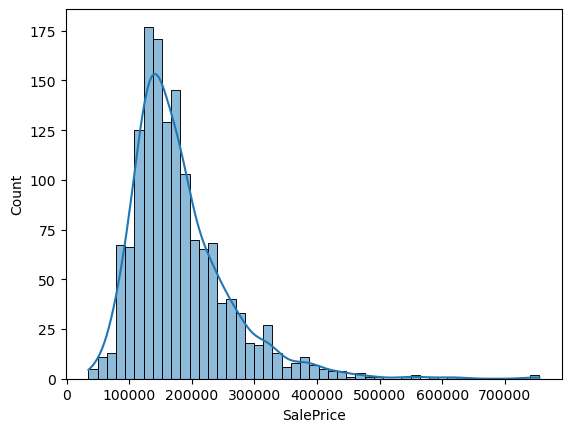

In [13]:
sns.histplot(df['SalePrice'], kde=True)

- Giá trị min và max cách khá xa quantile 25% và 75%, có thể thấy các giá trị min max chiếm 1 số lượng rất nhỏ.
- Dựa vào biểu đồ:
    - Phân bố giá nhà bị lệch về bên phải (skewess lớn).
    - Giá nhà lớn hơn `500k$` có thể là nhiễu, vì có số lượng chiếm rất ít.
    
   ==> với các mô hình machine learning, cần phải biến đổi dữ liệu về phân bố chuẩn và loại bỏ các điểm nhiễu

In [14]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

- Phân bố giá nhà bị lệch về bên trái (skewness lớn).
- Giá nhà > 500k có thể là nhiễu, vì chiếm số lượng rất ít.

##### Khảo sát các thuộc tính kiểu số (numerical attribute)

In [15]:
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   
3          1970         0.0         216           0  ...           0   
4          2000       350.0         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 37 columns]

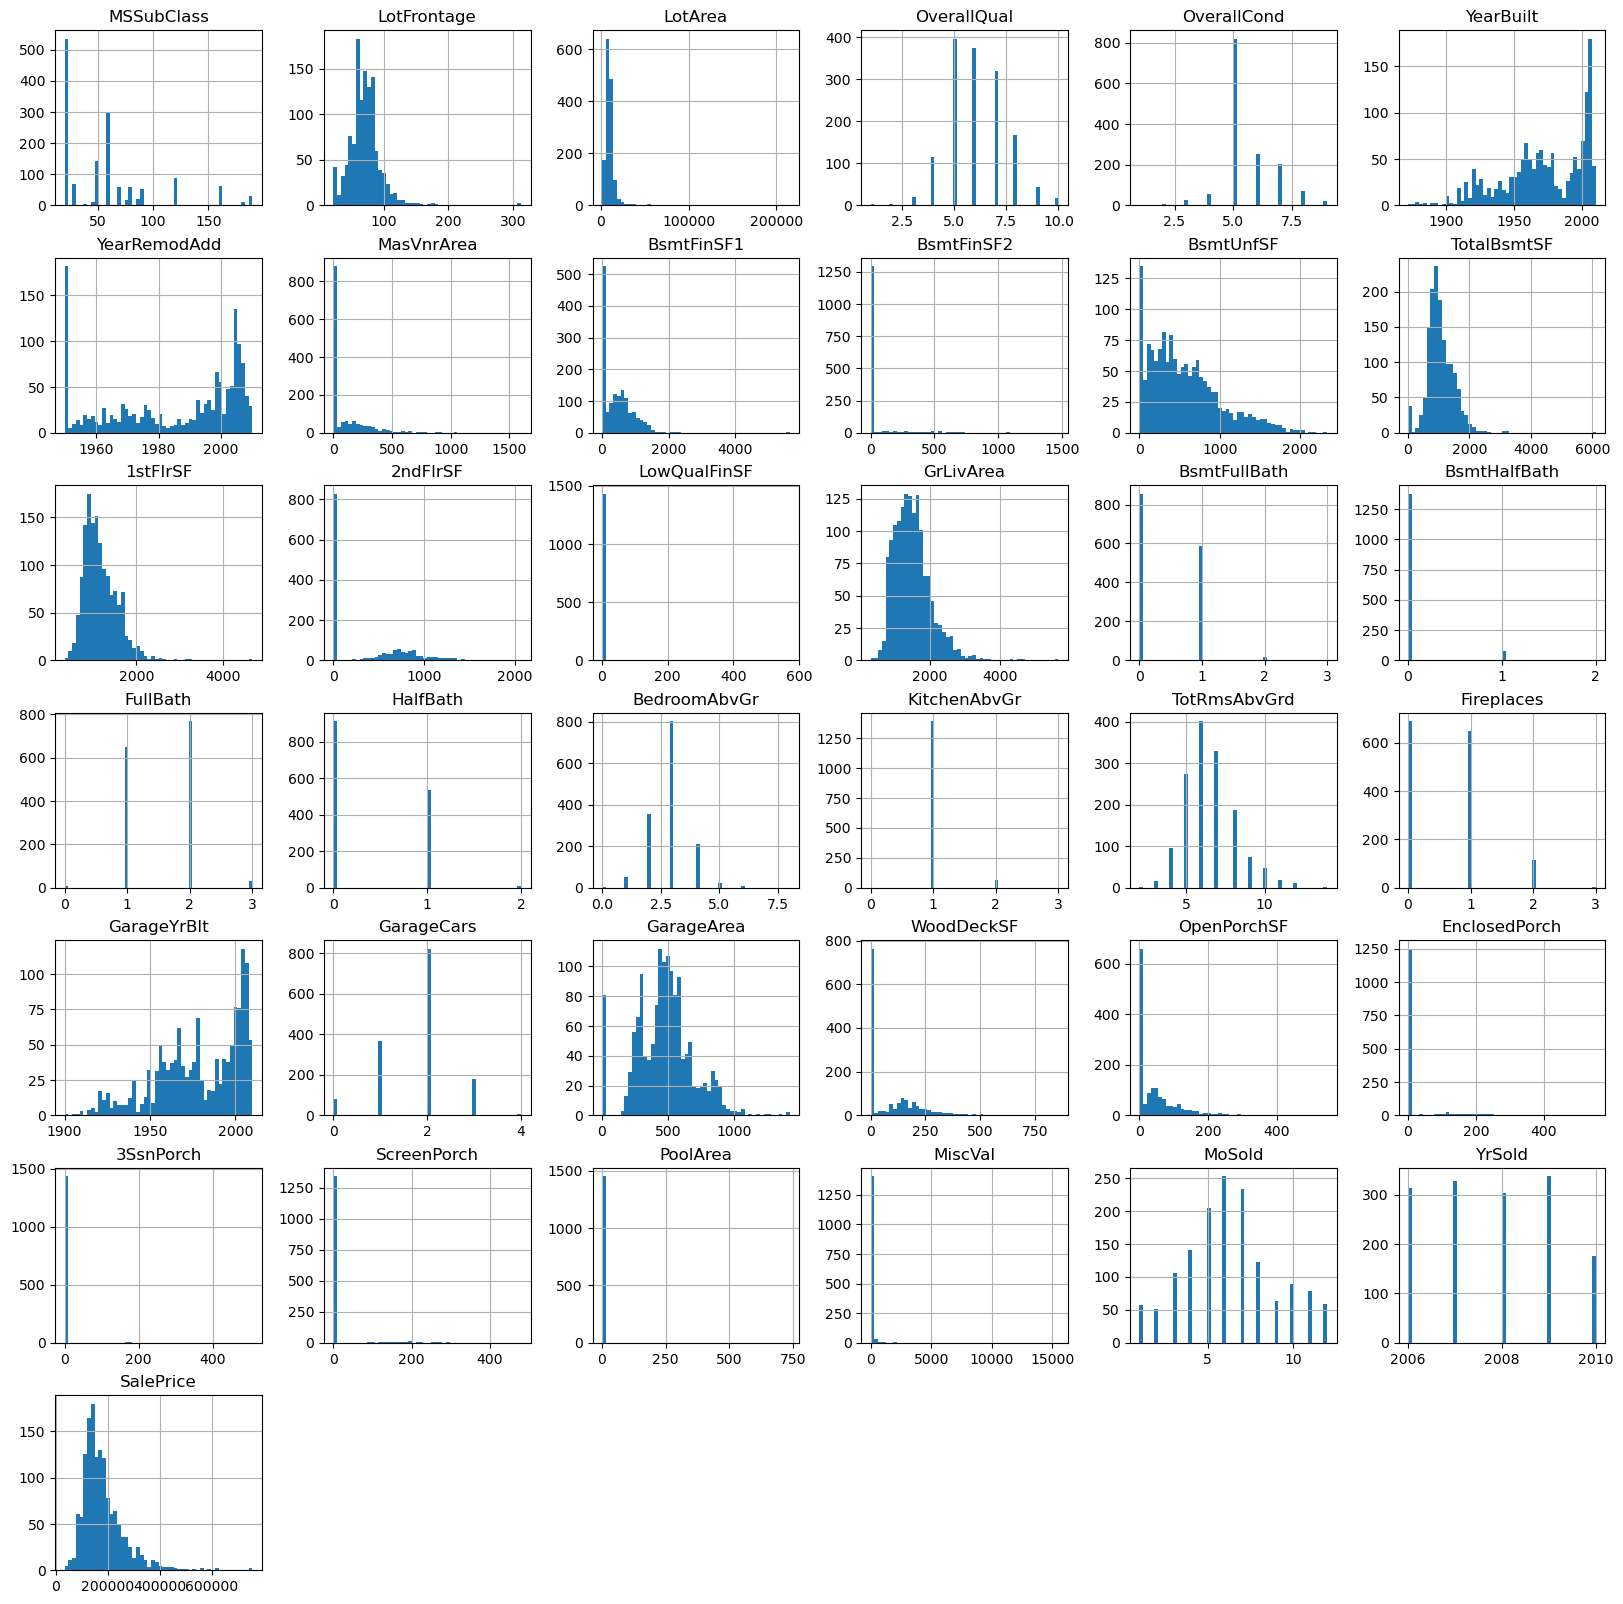

In [18]:
_ = df.hist(figsize=(20,20), bins=50)

- 1 số thuộc tính có phân bố tương tự `SalePrice`: `GrLiveArea`, `1stFirSF`, `TotalBsmtSF`.
- 1 số thuộc tính chỉ có giá trị 0: `BsmtFinSF2`, `LowQualFinSF`, `KitchenAbvGr`, `EnclosePorch`,...

Rút ra được 2 kết luận, cũng không nhiều với các biểu đồ này, don't worry, cứ tiếp tục phân tích và tìm hiểu.

##### Phân tích tương quan (đặc trưng <--> biến mục tiêu)

In [19]:
corr_mat = df_num.corr()
corr_mat

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       0.022936     0.193458  0.104160     0.411876    -0.128101   
BsmtFinSF1      -0.069836     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.392075  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.457181  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.080177  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.038469  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.402797  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.100949  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333    -0.007234  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.198769  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.053532  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.263170  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.006069 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.352096  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.266639  0.271364     0.396765    -0.023820   
GarageYrBlt      0.085072     0.070250 -0.024947     0.547766    -0.324297   
GarageCars      -0.040110     0.285691  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.344997  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.088521  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.151972  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.010700 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.070029  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.041383  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.206167  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.003368  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.011200  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.007450 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.351799  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.022936   -0.069836   -0.065649   
LotFrontage     0.123349      0.088866    0.193458    0.233633    0.049900   
LotArea         0.014228      0.013788    0.104160    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.411876    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.128101   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.315707    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.179618    0.128451   -0.067759   
MasVnrArea      0.315707      0.179618    1.000000    0.264736   -0.072319   
BsmtFinSF1      0.249503      0.128451    0.264736    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.072319   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.114442   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.363936    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

Tương quan mạnh giữa các đặc trưng và `SalePrice`

In [20]:
import numpy as np

In [21]:
# corr > 0.5
sp_corr_mat = corr_mat['SalePrice']
sp_corr_mat[np.abs(sp_corr_mat > 0.5)].sort_values(ascending=False)[1:]

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

==> tìm được 10 thuộc tính có hệ số tương quan cao với `SalePrice`. Tuy nhiên, các biểu đồ có thể giúp có nhiều insight hơn
    - Các biểu đồ có thể giúp phát hiện nhiễu (outliers).
    - Hệ số tương quan cao (?!) chưa chắc 2 biến có mối quan hệ tuyến tính vì `cao` ở đây rất chủ quan.

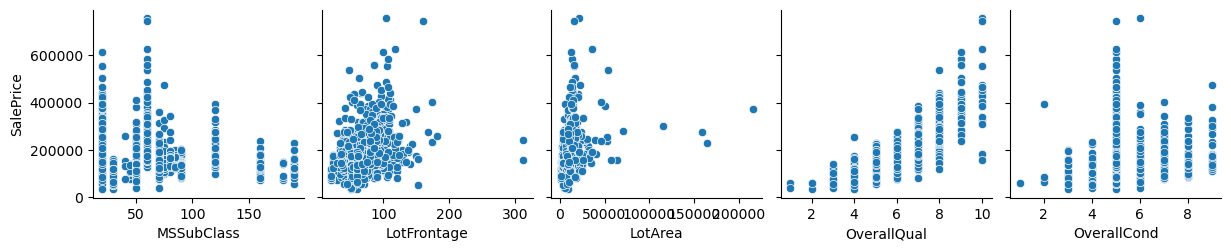

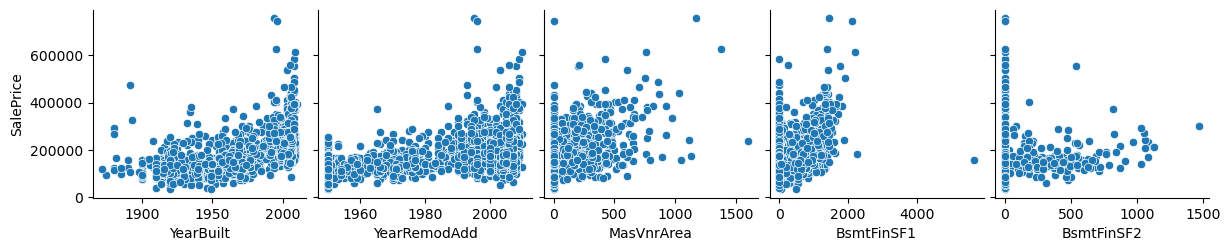

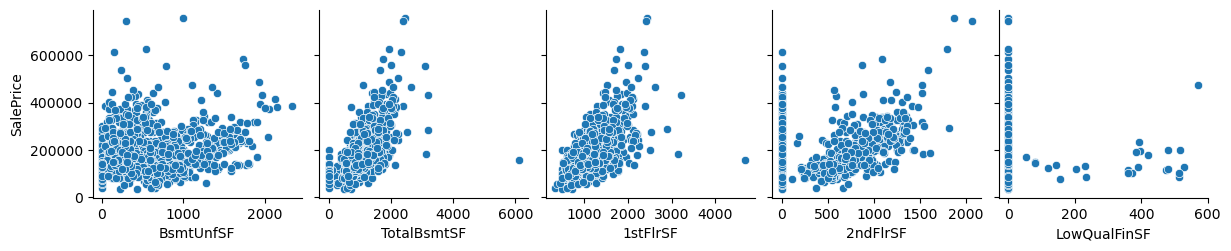

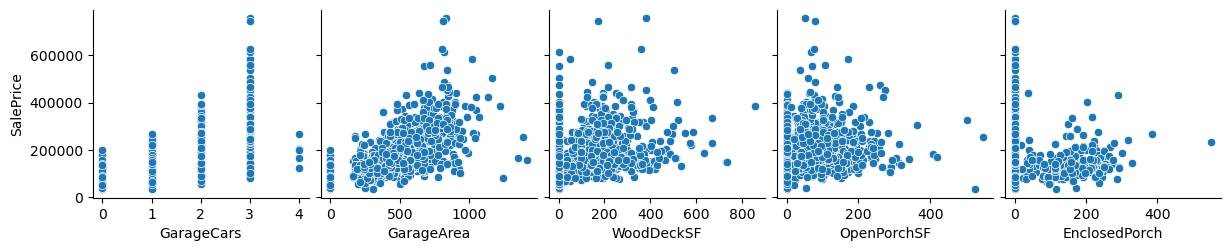

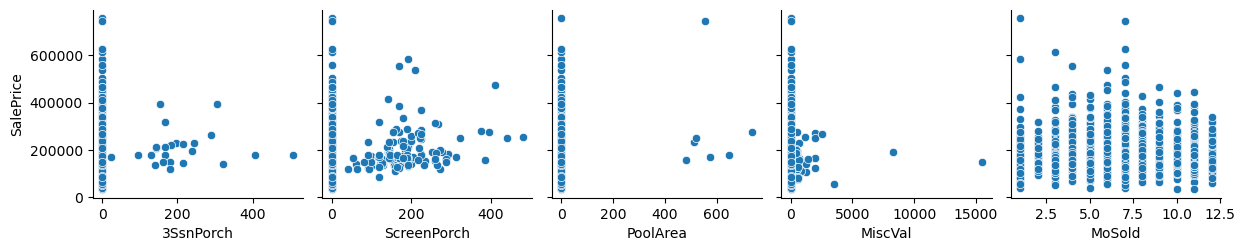

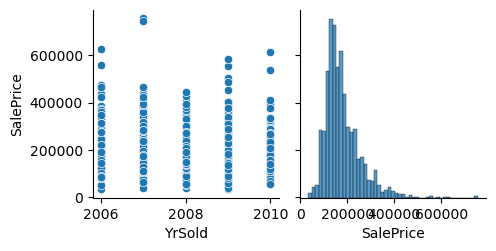

In [23]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(df_num, x_vars=df_num.columns[i:i+5], y_vars='SalePrice')

- Đối chiếu các thuộc tính có hệ số tương quan cao (`OverallQual`, `GrLivArea`, `TotalBsmtSF`,...) với `SalePrice` và biểu đồ, có thể thấy các thuộc tính này có tương quan thuận với `SalePrice`.
- Các biểu đồ theo đường thẳng, do các thuộc tính tuy là kiểu số nhưng có giá trị rời rạc, nhưng dùng để do chất lượng (0->5).
- Có khá nhiều thuộc tính có giá trị `0`: có thể hiểu giá trị các thuộc tính này không phải căn nhà nào cũng có. Nếu nhìn kỹ, có thể thấy `2ndFlrSF` có tương quan cao với `SalePrice`, nhưng hệ số tương quan lại không cao -- lý giải là do thuộc tính này có khá nhiều giá trị `0` --> ta sẽ loại bỏ các giá trị `0` này và tính lại hệ số tương quan.

In [ ]:
def sort_dict(x):
    return np.abs(x[1])

In [25]:
col2corr_coeffs = {}

for i, col in enumerate(df_num.columns[:-1]):
    temp_df = df[[col, 'SalePrice']][df_num[col] != 0]
    corr_coeff = temp_df.corr()['SalePrice'][0]
    
    col2corr_coeffs[col] = corr_coeff

col2corr_coeffs = sorted(col2corr_coeffs.items(), key=lambda x: np.abs(x[1]), reverse=True)
col2corr_coeffs

[('OverallQual', 0.7909816005838053),
 ('GrLivArea', 0.7086244776126515),
 ('2ndFlrSF', 0.6733048324568376),
 ('GarageCars', 0.6370954062078923),
 ('TotalBsmtSF', 0.6096808188074374),
 ('GarageArea', 0.6084052829168346),
 ('1stFlrSF', 0.6058521846919153),
 ('FullBath', 0.5745626737760822),
 ('TotRmsAbvGrd', 0.5337231555820284),
 ('YearBuilt', 0.5228973328794967),
 ('YearRemodAdd', 0.5071009671113866),
 ('GarageYrBlt', 0.4863616774878596),
 ('BsmtFinSF1', 0.47169042652357296),
 ('MasVnrArea', 0.43409021975689227),
 ('LotFrontage', 0.35179909657067737),
 ('LowQualFinSF', 0.30007501655501323),
 ('LotArea', 0.2638433538714051),
 ('ScreenPorch', 0.2554300795487841),
 ('EnclosedPorch', 0.24127883630117497),
 ('BsmtFinSF2', 0.19895609430836594),
 ('WoodDeckSF', 0.1937060123752066),
 ('BedroomAbvGr', 0.18093669310848806),
 ('BsmtUnfSF', 0.16926100049514173),
 ('KitchenAbvGr', -0.1392006921778576),
 ('Fireplaces', 0.12166058421363891),
 ('MiscVal', 0.08896338917298921),
 ('OpenPorchSF', 0.08645

==> hệ số tương quan so với `SalePrice` đã có sự khác biệt, hệ số của `2ndFlrSF` tăng khá nhiều

In [26]:
top_features = [k for k, v in col2corr_coeffs if abs(v) >= 0.5]
top_features

['OverallQual',
 'GrLivArea',
 '2ndFlrSF',
 'GarageCars',
 'TotalBsmtSF',
 'GarageArea',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd']

- Dựa vào các hệ số tương quan, ta có thể chọn ra các thuộc tính phù hợp cho việc dự đoán `SalePrice`. Tuy nhiên, sẽ có 1 số insights khác chưa được nhìn ra/phân tích --> đây là chỗ cho domain knowledge tỏa sáng.
- Ví dụ như thuộc tính `GarageCars` gần như tương quan thuận với `SalePrice`, nhưng giá trị `4` là không như vậy --> cần có kiến thức sale nhà mới nhìn ra lý do tại sao.

##### Phân tích tương quan (đặc trưng <--> đặc trưng)
- Dùng heatmap là cách phổ biến cho loại phân tích này

<AxesSubplot:>

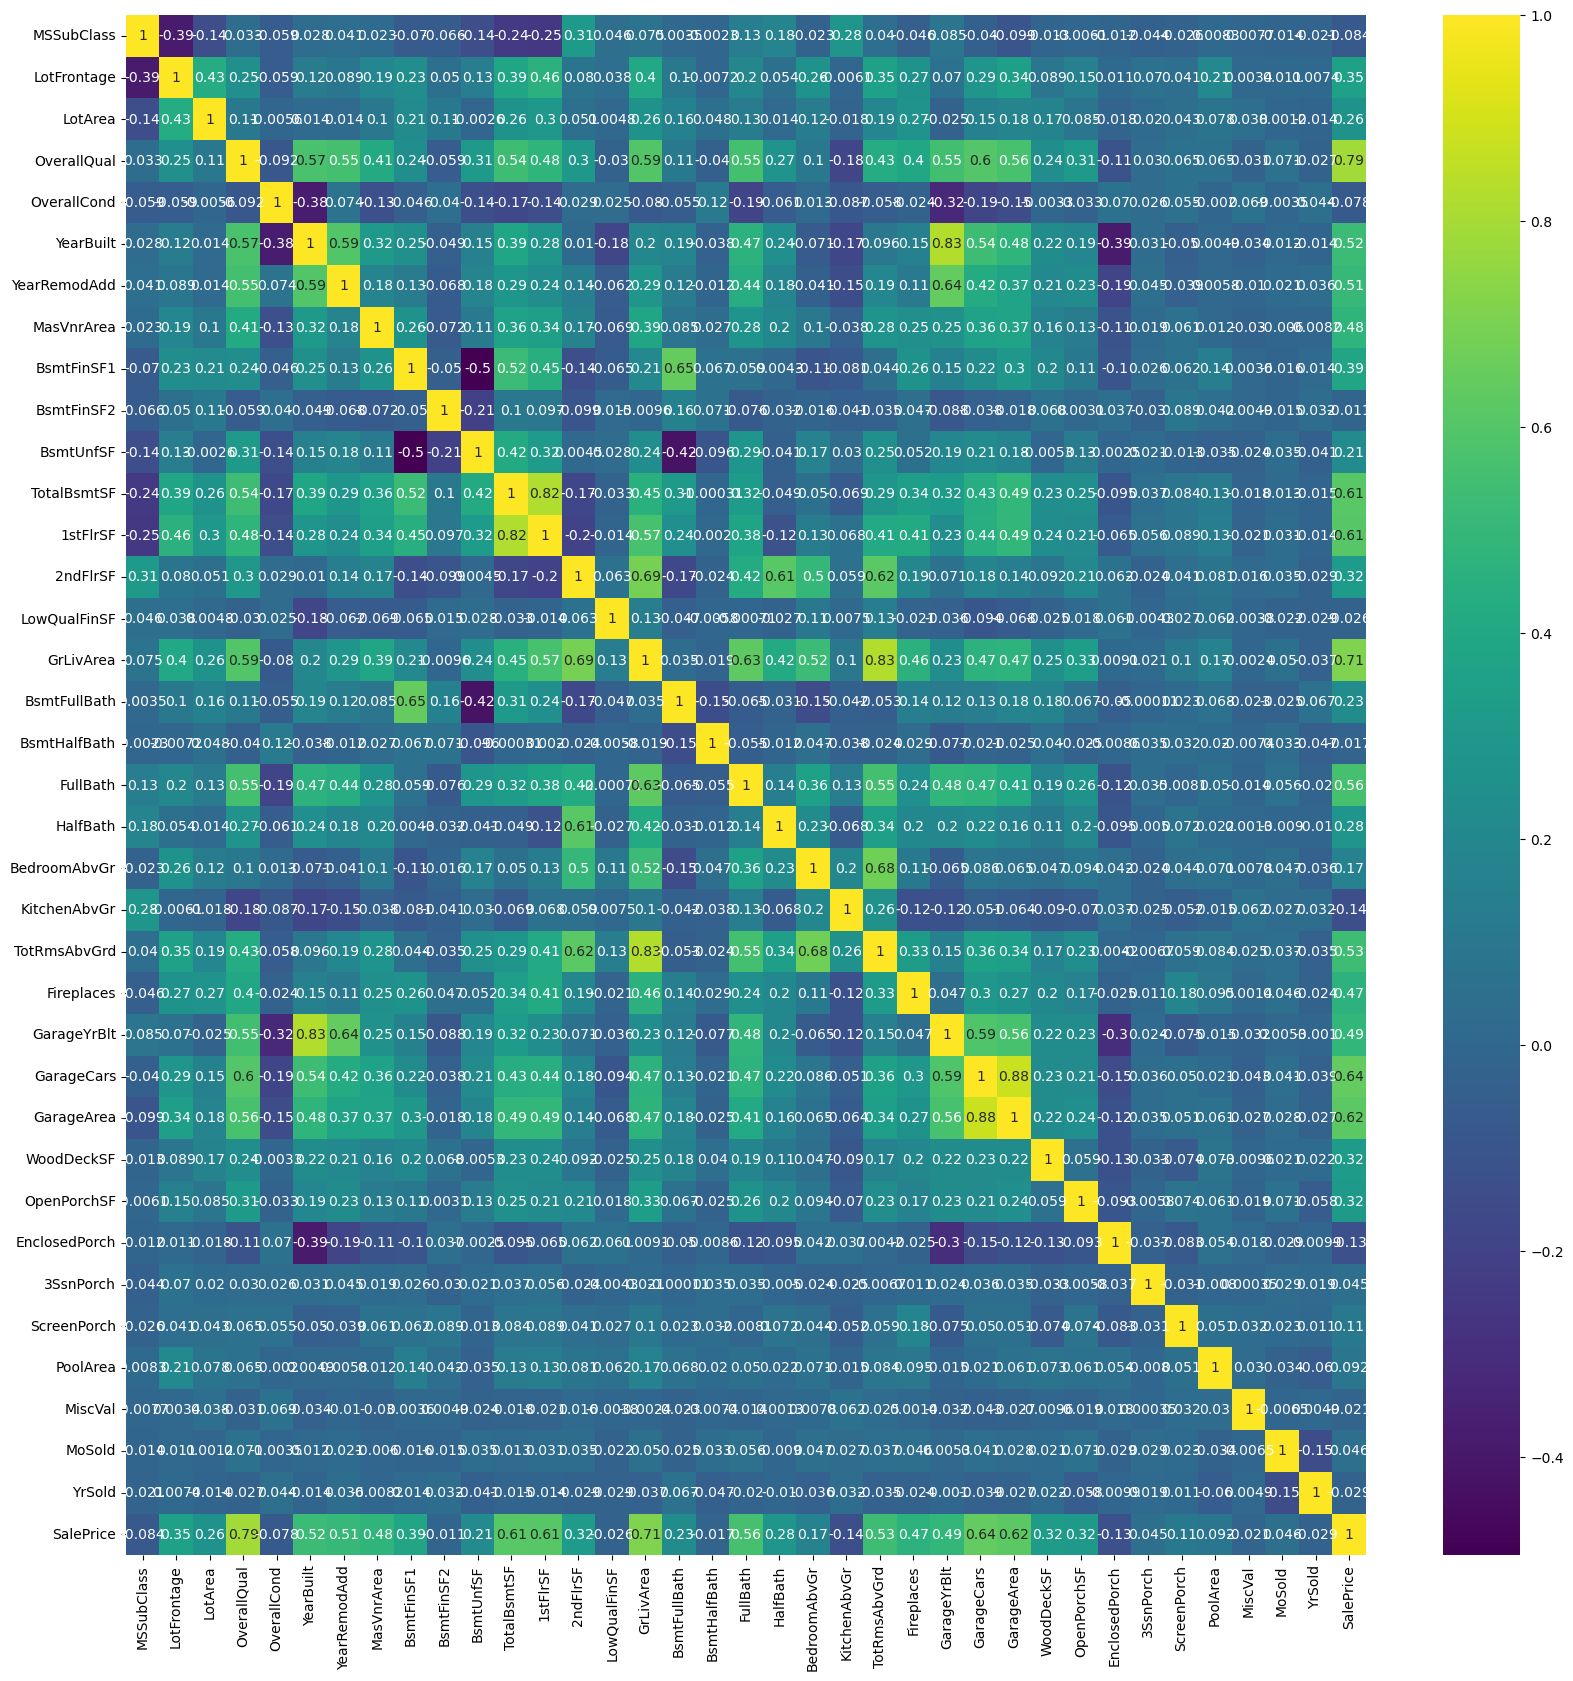

In [28]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_mat, cmap='viridis', annot=True, annot_kws={'size': 10})

<AxesSubplot:>

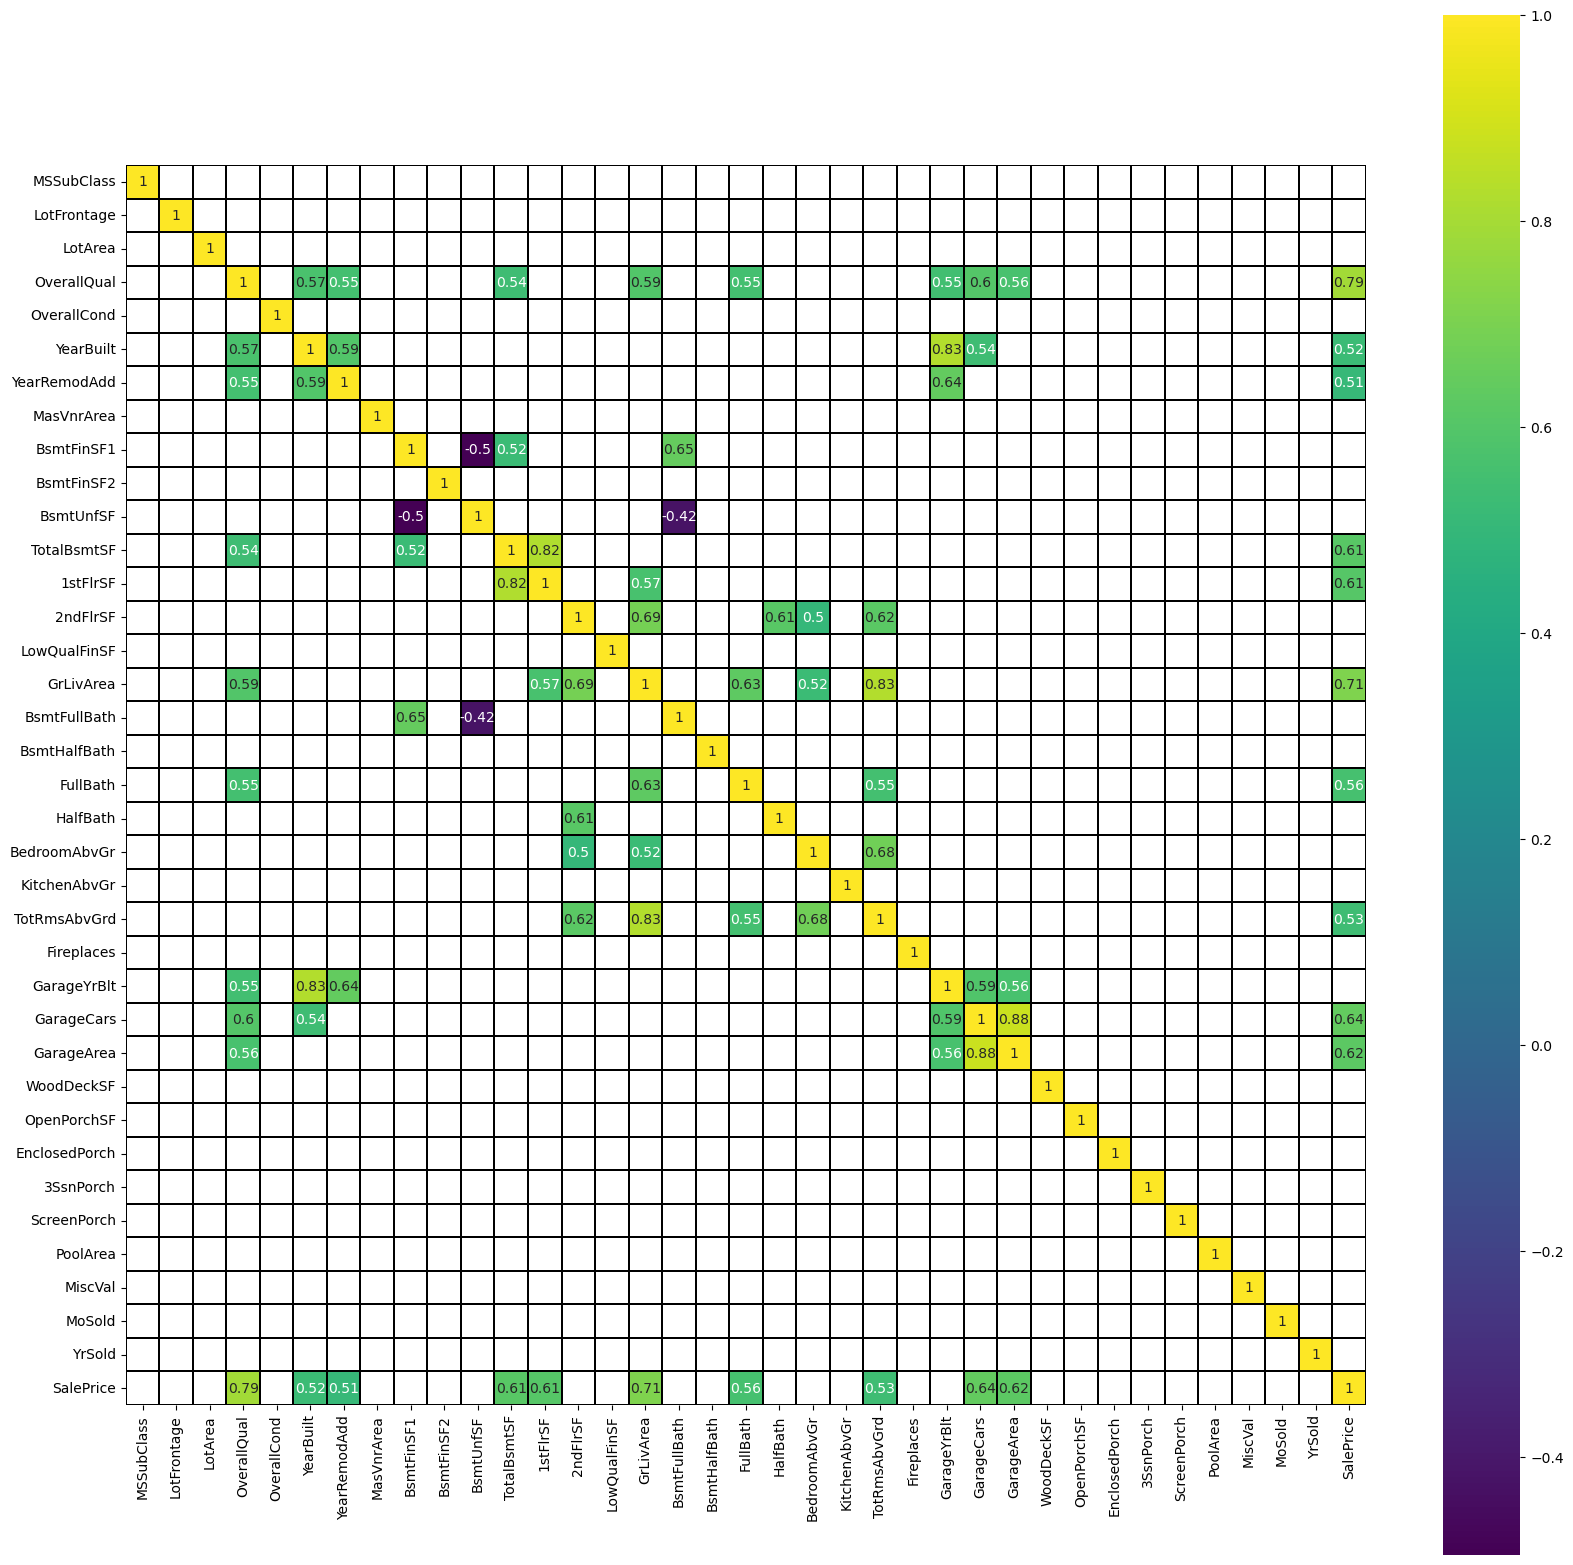

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_mat[(corr_mat >= 0.5) | (corr_mat < -0.4)],
            square=True, linewidth=0.1, linecolor='black',
            cmap='viridis', annot=True, annot_kws={'size': 10})

- 1 vài cặp thuộc tính có tương quan thuận cao: `YearBuild/GarageYrBlt`, `1stFlrSF/TotalBsmtSF`
- 1 vài cặp thuộc tính có tương quan nghịch: `BsmtUnfSF/BsmtFinSF1`, `BsmtUnfSF/BsmtFullBath`
- và nhiều cặp khác

Kết quả phân tích tương quan đặc trưng-đặc trưng có thể được dùng để bỏ bớt 1 số feature có tương quan cao (ví dụ `GarageCars`/`GarageArea`, khá hiển nhiên, garage to thì để được nhiều xe) hoặc kết hợp các đặc trưng để có 1 đặc trưng mới (`1stFlrSF`/`TotalBsmtSF` --> `TotalBsmtSF` thành có hoặc không có basement). Tuy nhiên, tất cả giả thuyết đều cần thực nghiệm chứng minh.

##### Phân tích tương quan - thuộc tính loại (categorical) và SalePrice

In [33]:
df_cate = df.select_dtypes(include='O')
df_cate['SalePrice'] = df['SalePrice']
df_cate.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... Functional FireplaceQu GarageType  \
0      CollgCr       Norm       Norm  ...        Typ         NaN     Attchd   
1      Veenker      Feedr       Norm  ...        Typ          TA     Attchd   
2      CollgCr       Norm       Norm  ...        Typ          TA     Attchd   
3      Crawfor       Norm       Norm  ...        Typ          Gd     Detchd   
4      NoRidge       Norm       Norm  ...        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive SaleType SaleCondition  \
0          RFn         TA         TA          Y       WD        Normal   
1          RFn         TA         TA          Y       WD        Normal   
2          RFn         TA         TA          Y       WD        Normal   
3          Unf         TA         TA          Y       WD       Abnorml   
4          RFn         TA         TA          Y       WD        Normal   

  SalePrice  
0    208500  
1    181500  
2    223500  
3    140000  
4    250000  

[5 rows x 40 columns]

##### Tương quan thuộc tính kiểu loại và `SalePrice`

Khảo sát phân bố của các thuộc tính

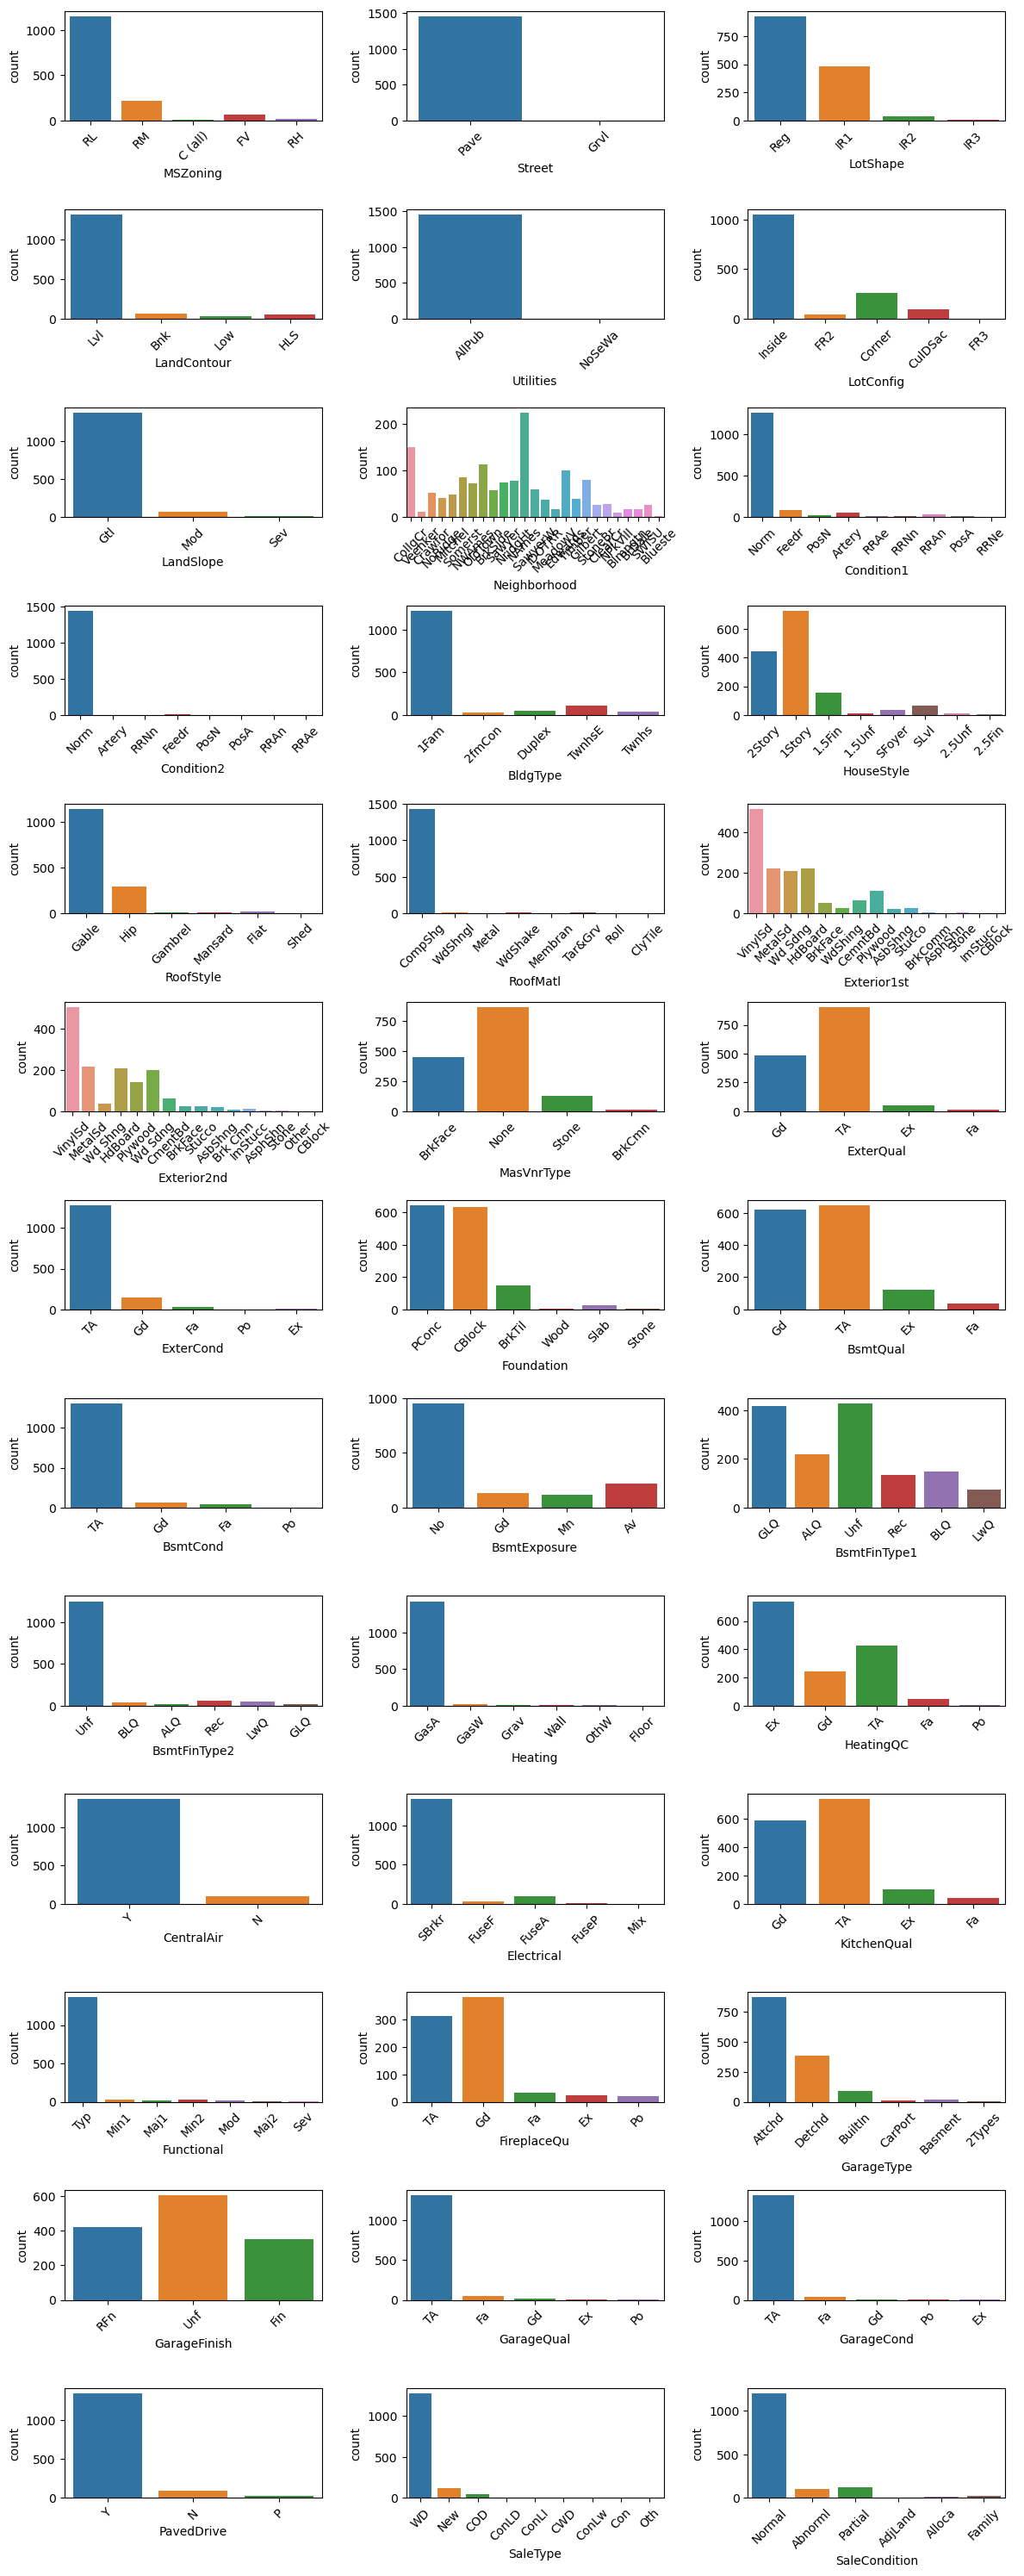

In [40]:
import warnings
warnings.filterwarnings('ignore')

fig, axes = plt.subplots(int(len(df_cate.columns[:-1]) / 3), 3, figsize=(12,30))

for i, ax in enumerate(fig.axes):
    if i < len(df_cate.columns[:-1]):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_cate.columns[i],data=df_cate, ax=ax)
        
fig.tight_layout()

1 số thuộc tính như `Utilities`, `Heating`, `GarageCond`, `Functional` hầu như chỉ có 1 loại giá trị --> khi hiện thực mô hình dự đoán, các thuộc tính này có thể được bỏ qua.

In [42]:
plt.figure(figsize=(6,4))

# biểu đồ numerical <--> categorical: sử dụng boxplot
ax = sns.boxplot(data=df_cate, x='MSZoning', y='SalePrice')

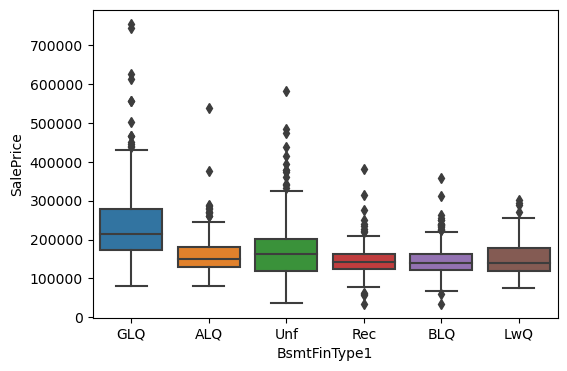

In [43]:
plt.figure(figsize=(6,4))

# biểu đồ numerical <--> categorical: sử dụng boxplot
ax = sns.boxplot(data=df_cate, x='BsmtFinType1', y='SalePrice')

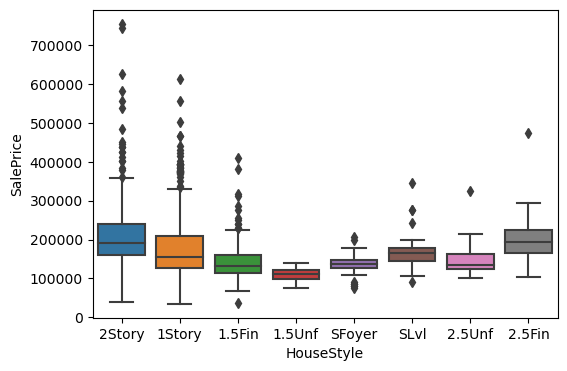

In [44]:
plt.figure(figsize=(6,4))

# biểu đồ numerical <--> categorical: sử dụng boxplot
ax = sns.boxplot(data=df_cate, x='HouseStyle', y='SalePrice')

##### Xử lý dữ liệu còn thiếu

Có 2 cách:
- Bỏ các dòng có giá trị thiếu (drop NA values)
- Tạo dữ liệu giả (imputation)

Các kỹ thuật imputation:
- Thêm 1 số bất kì: 0, 1, 100,...
- Thêm giá trị hay xuất hiện
- Sử dụng thống kê: thêm mean/mode/median
- Sử dụng kỹ thuật nearest neighbors (kNN)

In [46]:
missing = df.isna().sum()
missing = missing[missing > 0]

print('total missing: ', len(missing))
missing

total missing:  15


LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [47]:
missing_num = [col for col in missing.index if df[col].dtypes != 'O']
missing_obj = list(set(missing.index) - set(missing_num))

print("Missing numerical: ", missing_num)
print("Missing object: ", missing_obj)

Missing numerical:  ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
Missing object:  ['GarageQual', 'GarageType', 'BsmtCond', 'BsmtExposure', 'BsmtQual', 'MasVnrType', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageFinish', 'BsmtFinType1', 'GarageCond']


In [48]:
sns.histplot(df['LotFrontage'])

<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

In [49]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

In [50]:
sns.histplot(df['MasVnrArea'])

<AxesSubplot:xlabel='MasVnrArea', ylabel='Count'>

In [51]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [52]:
for col in ['GarageQual', 'GarageType', 'GarageFinish', 'GarageCond']:
    df[col] = df[col].fillna('NA')

In [53]:
for col in ['BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1']:
    df[col] = df[col].fillna('NA')

<AxesSubplot:xlabel='Electrical', ylabel='Count'>

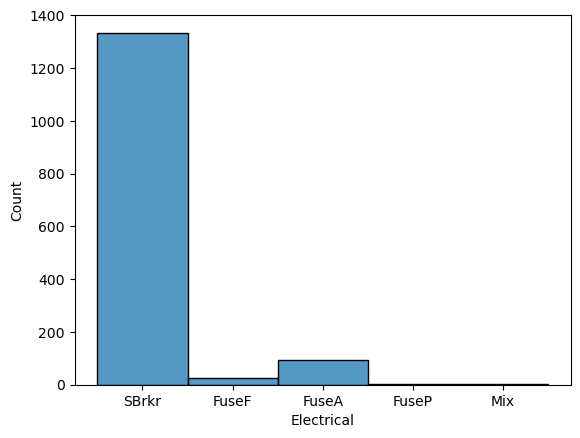

In [54]:
sns.histplot(df['Electrical'])

In [55]:
df['Electrical'] = df['Electrical'].fillna('SBrkr')

In [57]:
sns.histplot(df['GarageYrBlt'])

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Count'>

==> tới đây có 1 số nghi vấn, các cột như `GarageArea`, `GarageCars` lại không bị thiếu, cần kiểm tra thử `GarageArea`

In [58]:
gr = df['GarageArea'][df['GarageYrBlt'].isna()]
gr

39      0
48      0
78      0
88      0
89      0
       ..
1349    0
1407    0
1449    0
1450    0
1453    0
Name: GarageArea, Length: 81, dtype: int64

==> Thuộc tính `GarageYrBlt` có thể không quan trọng trong việc dự đoán, nhưng dễ gây nhập nhằng, có thể loại ra khỏi việc huấn luyện mô hình.

In [59]:
df.drop(['GarageYrBlt'], axis=1, inplace=True)

In [61]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['FireplaceQu'] = df['FireplaceQu'].fillna('NA')

In [62]:
missing = df.isna().sum()
missing = missing[missing > 0]

print('total missing: ', len(missing))
missing

total missing:  0


Series([], dtype: int64)

##### LabelEncode và OneHotEncoding
- Thực hiện LabelEncoding cho các đặc trưng có tính thứ tự (như liên quan đến chất lượng,..) và OneHotEncoding cho các đặc trưng còn lại.

In [63]:
from sklearn import preprocessing

In [64]:
df_cate.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [65]:
foundation_vals = df['Foundation']
bsmt_qual_vals = df['BsmtQual']

print(foundation_vals.unique())
print(bsmt_qual_vals.unique())

['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']
['Gd' 'TA' 'Ex' 'NA' 'Fa']


In [66]:
found_le = preprocessing.LabelEncoder()
found_le.fit(foundation_vals)
print('Classes: ', found_le.classes_)
print(found_le.transform(foundation_vals.unique()))

Classes:  ['BrkTil' 'CBlock' 'PConc' 'Slab' 'Stone' 'Wood']
[2 1 0 5 3 4]


In [68]:
found_oh = preprocessing.OneHotEncoder()
found_oh.fit(foundation_vals.to_numpy().reshape(-1,1))

OneHotEncoder()

In [69]:
print(found_oh.transform(foundation_vals.unique().reshape(-1,1)))

  (0, 2)	1.0
  (1, 1)	1.0
  (2, 0)	1.0
  (3, 5)	1.0
  (4, 3)	1.0
  (5, 4)	1.0


Output sau khi transform là 1 ma trận thưa (sparse matrix), mục tiêu của kiểu dữ liệu này là để tiết kiệm không gian lưu trữ. Ta sẽ đặt tham số `sparse` là `False` để output ra ma trận thông thường để dễ quan sát hơn.

In [70]:
found_oh = preprocessing.OneHotEncoder(sparse=False) # 
found_oh.fit(foundation_vals.to_numpy().reshape(-1,1))

print(found_oh.transform(foundation_vals.unique().reshape(-1,1)))

[[0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]


##### Tiền xử lý và chuẩn hóa dữ liệu
- Tính skewness/kurtosis và thực hiện transform cho các đặc trưng: `GrLivArea`, `TotalBsmtSF`, `LotFrontage`, `1stFlrSF`, `MiscVal`
- Gợi ý: `numpy.log, numpy.log1p, numpy.boxcox, numpy.boxcox1p`.
- Mục tiêu của chuẩn hóa dữ liệu: các mô hình học máy như Linear Regression "thích" dữ liệu tuân theo phân phối chuẩn hơn. Do đó, chúng ta nên chuẩn hóa dữ liệu để giúp cho mô hình "học" tốt hơn.

In [71]:
from scipy.stats import norm

In [72]:
sns.distplot(df['SalePrice'], fit=norm)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

In [73]:
print("SKewess: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

SKewess: 1.882876
Kurtosis: 6.536282


- Trên biểu đồ: đường màu xanh là phân phối của dữ liệu, đường màu đen là phân phối chuẩn ước lượng từ dữ liệu. Khi 2 đường này trùng nhau thì cho thấy dữ liệu đã được chuẩn hóa, ta không cần phải thực hiện chuẩn hóa dữ liệu nữa. Ở biểu đồ trên của `SalePrice`, 2 đường phân phối lệch nhau khá nhiều --> cần chuẩn hóa dữ liệu.
- Ngoài cách nhìn vào biểu đồ, ta có thể tính 2 giá trị skewness (độ lệch về bên trái hay phải của đường cong màu xanh) và kurtosis (độ nhọn/tù của đường cong màu xanh). Nếu giá trị skewness và kurtosis càng xa giá trị 0, thì ta kết luận phân phối của dữ liệu càng lệch so với phân phối chuẩn và cần phải được chuẩn hóa.
- Skewness và Kurtosis của `SalePrice` đều > 0, ta sẽ chuẩn hóa dữ liệu `SalePrice`.

In [74]:
df['SalePrice_log'] = np.log(df['SalePrice'])

In [75]:
sns.distplot(df['SalePrice_log'], fit=norm)

<AxesSubplot:xlabel='SalePrice_log', ylabel='Density'>

In [76]:
print("SKewess: %f" % df['SalePrice_log'].skew())
print("Kurtosis: %f" % df['SalePrice_log'].kurt())

SKewess: 0.121335
Kurtosis: 0.809532


- Sau khi biến đổi log transform, 2 đường cong đã gần khớp nhau, các giá trị skewness và kurtosis đã gần sát về 0, ta có thể kết luận, dữ liệu `SalePrice` đã "chuẩn" hơn.
- Lưu ý: ban đầu vùng giá trị của `SalePrice ~ (200k, 500k)`, sau khi chuẩn hóa thành `SalePrice_log ~ (10.5, 13.5)`, các bạn có thắc mắc dữ liệu đã mất bản chất ban đầu --> đều này là đúng. Việc chuẩn hóa chỉ giúp mô hình học tốt hơn, trong ứng dụng thực tế, sau khi mô hình dự đoán ra biến `SalePrice_log`, ta sẽ hậu xử lý (post-process) kết quả này để có lại vùng giá trị theo đúng bản chất.

- Tiếp tục kiểm tra với `TotalBsmtSF`.

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='Density'>

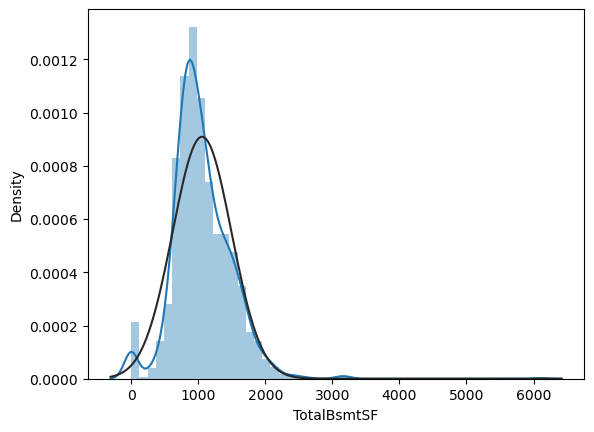

In [78]:
sns.distplot(df['TotalBsmtSF'], fit=norm)

In [79]:
df['TotalBsmtSF_log'] = np.log(df['TotalBsmtSF'])

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='Density'>

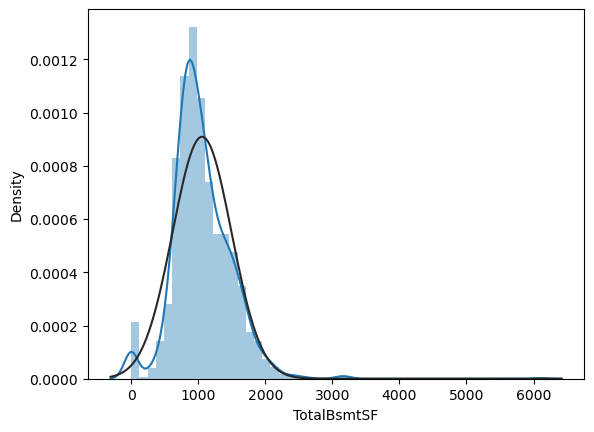

In [80]:
sns.distplot(df['TotalBsmtSF'], fit=norm)

- Với `TotalBsmtSF`, mặc dù đã thực hiện log transform, nhưng phân bố vẫn lệch. Ở đây là do `TotalBsmtSF` có khá nhiều giá trị 0. 1 cách giải quyết là chỉ transform các giá trị khác 0.
- Ta sẽ thử làm việc này và transform lại.

In [81]:
df['has_Bsmt'] = pd.Series(len(df['TotalBsmtSF']), index=df.index)
df['has_Bsmt'] = 0
df.loc[df['TotalBsmtSF'] > 0, 'has_Bsmt'] = 1
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... PoolArea MiscVal MoSold YrSold SaleType  \
0    AllPub    Inside       Gtl  ...        0       0      2   2008       WD   
1    AllPub       FR2       Gtl  ...        0       0      5   2007       WD   
2    AllPub    Inside       Gtl  ...        0       0      9   2008       WD   
3    AllPub    Corner       Gtl  ...        0       0      2   2006       WD   
4    AllPub       FR2       Gtl  ...        0       0     12   2008       WD   

   SaleCondition  SalePrice  SalePrice_log  TotalBsmtSF_log has_Bsmt  
0         Normal     208500      12.247694         6.752270        1  
1         Normal     181500      12.109011         7.140453        1  
2         Normal     223500      12.317167         6.824374        1  
3        Abnorml     140000      11.849398         6.628041        1  
4         Normal     250000      12.429216         7.043160        1  

[5 rows x 78 columns]

In [83]:
df.loc[df['has_Bsmt'] == 1, 'TotalBsmtSF'] = np.log(df['TotalBsmtSF'])

In [85]:
sns.distplot(df[df['TotalBsmtSF'] > 0]['TotalBsmtSF'], fit=norm)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='Density'>

- Khi transform chỉ với các giá trị khác 0 thì ta có thuộc tính `TotalBsmtSF` đã được chuẩn hóa tốt hơn khá nhiều so với trước.
- Lưu ý: log transform sẽ không hoạt động khi có giá trị âm hoặc nhiều giá trị 0 trong danh sách giá trị, nên cần phải xử lý các giá trị này trước khi thực hiện chuyển hóa.

#### Bài tập
1. Áp dụng lý thuyết CLT để tính giá trị trung bình của `SalePrice` (tập dữ liệu giá nhà) chỉ sử dụng 400 mẫu.
2. Phân tích mối quan hệ giữa saleprice và các thuộc tính kiểu loại (categorical data) và rút ra nhận xét. Ít nhất 6 thuộc tính.
3. Chọn kỹ thuật phù hợp (LabelEncoding và OnehotEncoding) để biến đổi các thuộc tính kiểu loại.
4. Xử lý nhiễu (nếu có) cho các thuộc tính GrLivArea, TotalBsmtSF, 1stFlrSF, BsmtFinSF1 và tính lại hệ số tương quan so với SalePrice.